In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import a_funciones as fn
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import scipy
import math
import os
import zipfile
import warnings
import joblib


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier


# Descripción variables

Descripcion de las variables

* ID: Unique identifier for each record.
* CreditScore: La puntuación crediticia del individuo
* DebtRatio: La relación entre deuda y activos totales
* Assets: Activos totales del individuo
* Age: La edad del individuo
* NumberOfDependents: El número de dependientes del individuo
* NumberOfOpenCreditLinesAndLoans: El número de líneas de crédito y préstamos abiertos
* MonthlyIncome: El ingreso mensual del individuo
* NumberOfTimesPastDue: El número de veces que el individuo ha estado en mora
* EmploymentLength: Número de años empleados
* HomeOwnership: Tipo de propiedad de la vivienda (Alquiler, Propia, Hipoteca)
* Education: Nivel educativo (Secundaria, Licenciatura, Maestría, Doctorado)
* MaritalStatus: Estado civil (soltero, casado, divorciado, viudo)
* YearsAtCurrentAddress: Número de años en la dirección actual
* NoPaidPerc: Proporción de los pagos que el consumidor no ha realizado en todos sus créditos
* NewLoanApplication: Cantidad de dinero que el cliente ha solicitado a la institución

In [2]:
df = pd.read_csv('data/datos_historicos.csv', sep = ',')
df

,ID,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,HomeOwnership,Education,MaritalStatus,YearsAtCurrentAddress,NoPaidPerc
0,1,384,0.016560,37950,20,0,2,17355,9,28,Mortgage,Bachelor,Divorced,18,0.196566
1,2,516,0.138825,22909,46,5,8,7175,13,0,Rent,Bachelor,Married,9,0.264438
2,3,638,0.391149,126521,80,5,7,1910,6,25,Rent,Bachelor,Single,9,0.287568
3,4,363,0.463521,39543,54,9,0,19339,5,22,Own,High School,Widowed,3,0.181348
4,5,804,0.504824,38522,72,1,10,7928,18,19,Own,PhD,Married,5,0.343376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,448,0.602547,57758,22,9,19,17797,19,5,Rent,Bachelor,Widowed,2,0.190319
9996,9997,643,0.633910,67051,85,3,1,7034,4,0,Rent,High School,Married,1,0.168900
9997,9998,695,0.019713,65309,42,4,3,9105,18,4,Rent,Bachelor,Divorced,6,0.237987
9998,9999,387,0.174242,115144,20,3,10,19388,0,11,Mortgage,PhD,Divorced,5,0.180394


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               10000 non-null  int64  
 1   CreditScore                      10000 non-null  int64  
 2   DebtRatio                        10000 non-null  float64
 3   Assets                           10000 non-null  int64  
 4   Age                              10000 non-null  int64  
 5   NumberOfDependents               10000 non-null  int64  
 6   NumberOfOpenCreditLinesAndLoans  10000 non-null  int64  
 7   MonthlyIncome                    10000 non-null  int64  
 8   NumberOfTimesPastDue             10000 non-null  int64  
 9   EmploymentLength                 10000 non-null  int64  
 10  HomeOwnership                    10000 non-null  object 
 11  Education                        10000 non-null  object 
 12  MaritalStatus      

In [6]:
# Datos duplicados

df.duplicated().sum()

0

In [7]:
# Datos faltantes por variable

df.isnull().sum()

ID                                 0
CreditScore                        0
DebtRatio                          0
Assets                             0
Age                                0
NumberOfDependents                 0
NumberOfOpenCreditLinesAndLoans    0
MonthlyIncome                      0
NumberOfTimesPastDue               0
EmploymentLength                   0
HomeOwnership                      0
Education                          0
MaritalStatus                      0
YearsAtCurrentAddress              0
NoPaidPerc                         0
dtype: int64

In [3]:
df = df.drop(columns=['ID'])

# EDA

In [4]:
df.describe()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,NoPaidPerc
count,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,577.648800,0.499706,109870.32650,53.21540,4.503500,9.452900,10446.551100,9.488900,14.598800,14.420900,0.226052
std,159.219702,0.287868,51950.50836,20.65087,2.862028,5.729211,5449.335633,5.766594,8.634077,8.710128,0.067179
min,300.000000,0.000035,20008.00000,18.00000,0.000000,0.000000,1001.000000,0.000000,0.000000,0.000000,0.000000
25%,438.000000,0.252349,64306.50000,35.75000,2.000000,4.000000,5719.000000,4.000000,7.000000,7.000000,0.198827
50%,581.000000,0.501707,110635.50000,53.00000,5.000000,9.000000,10427.000000,10.000000,15.000000,14.000000,0.233158
75%,717.000000,0.744447,153852.25000,71.00000,7.000000,14.000000,15123.250000,14.000000,22.000000,22.000000,0.267660
max,849.000000,0.999834,199984.00000,89.00000,9.000000,19.000000,19997.000000,19.000000,29.000000,29.000000,0.382792


* CreditScore: 

* DebRatio:

* NumberOfDependents:

* NumberOfOpenCreditLinesAndLoans:

* MonthlyIncome:

* NumberOfTimePastDue:

* NoPaidPerc

## Variables categoricas vs vr

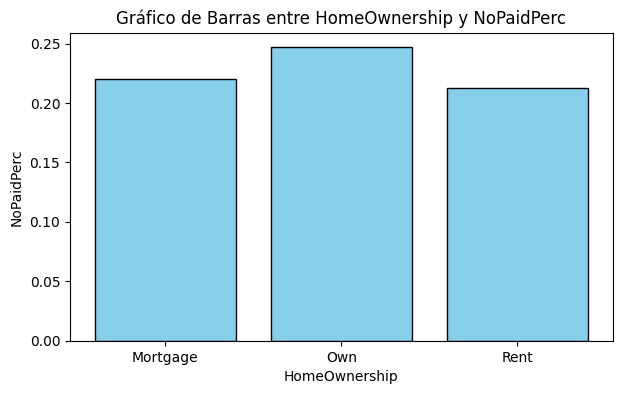

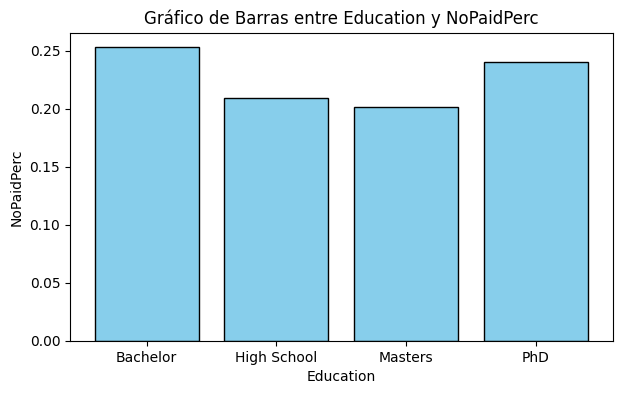

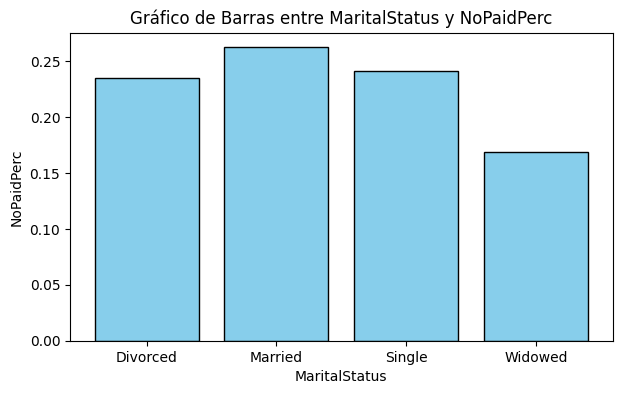

In [4]:
# Crear gráfico para HomeOwnership
fn.barplot(df, 'HomeOwnership', 'NoPaidPerc',
                     'Gráfico de Barras entre HomeOwnership y NoPaidPerc')

# Crear gráfico para Education
fn.barplot(df, 'Education', 'NoPaidPerc',
                     'Gráfico de Barras entre Education y NoPaidPerc')

# Crear gráfico para Marital
fn.barplot(df, 'MaritalStatus', 'NoPaidPerc',
                     'Gráfico de Barras entre MaritalStatus y NoPaidPerc')

## V. numérics vs Vr

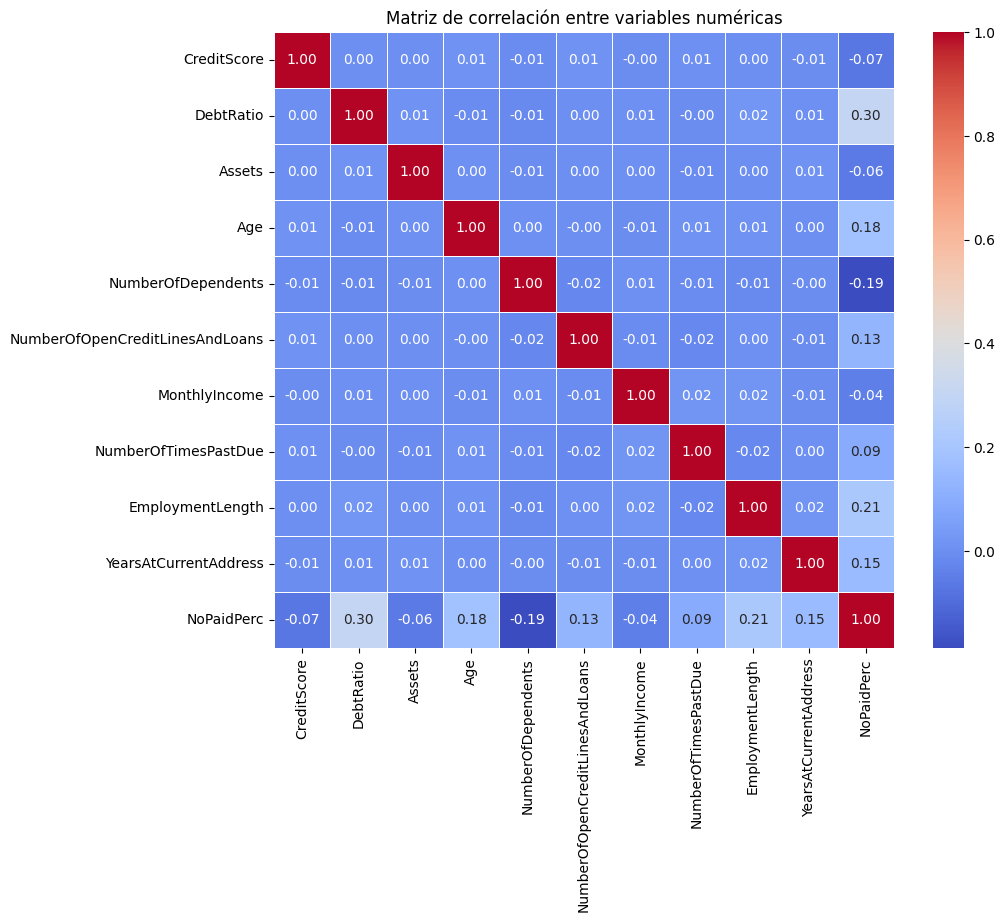

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

# Graficar
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de correlación entre variables numéricas')
plt.show()

### Variables con correlación más alta

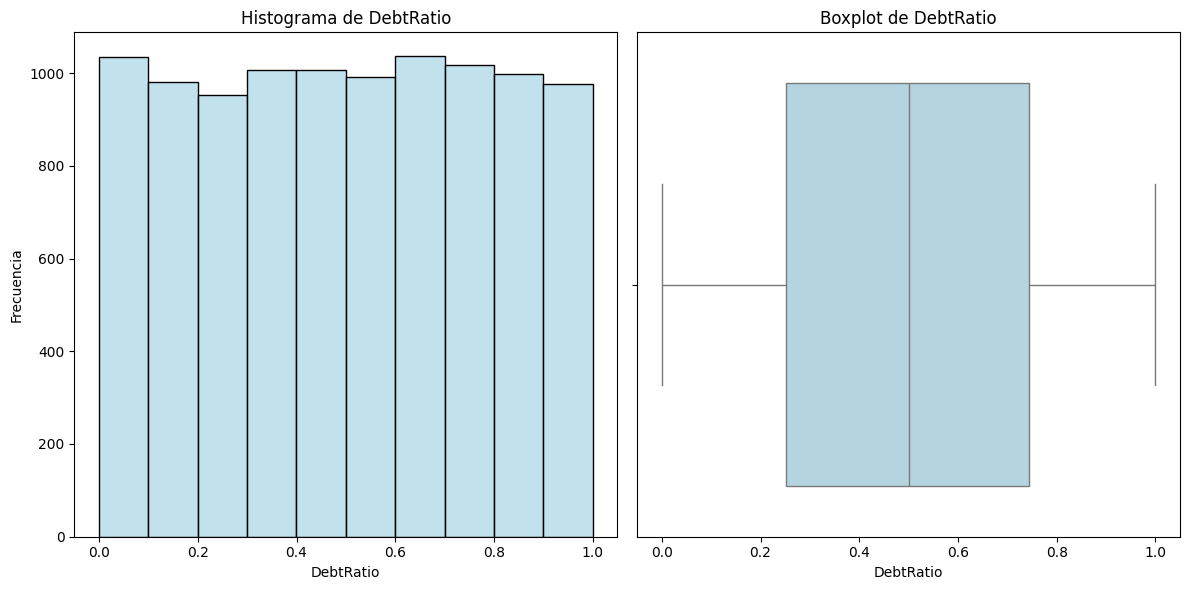

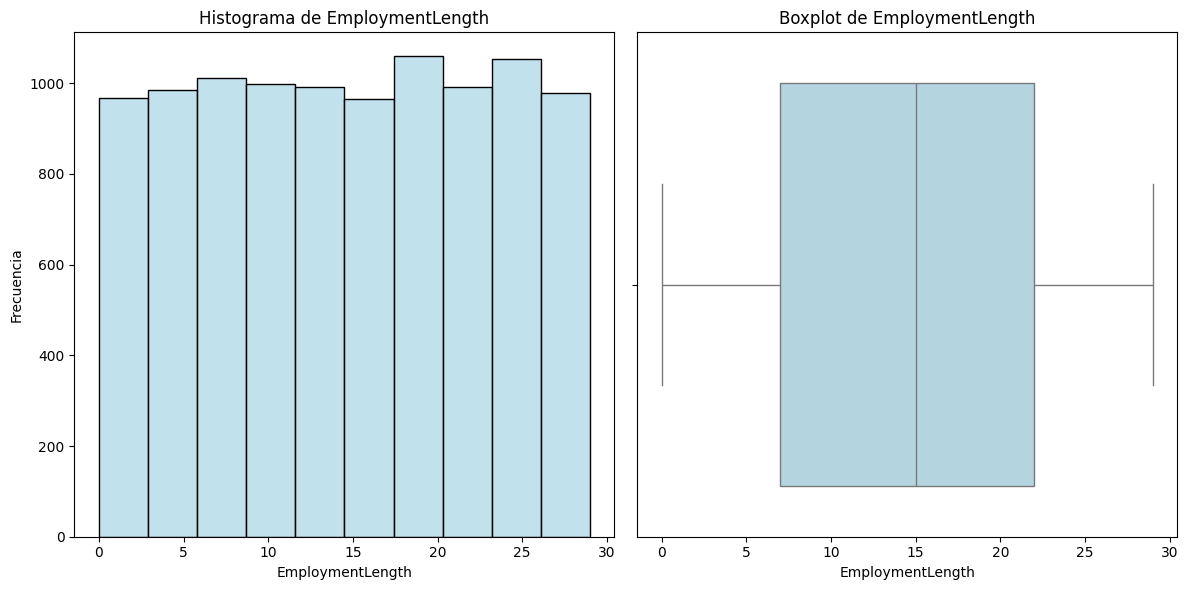

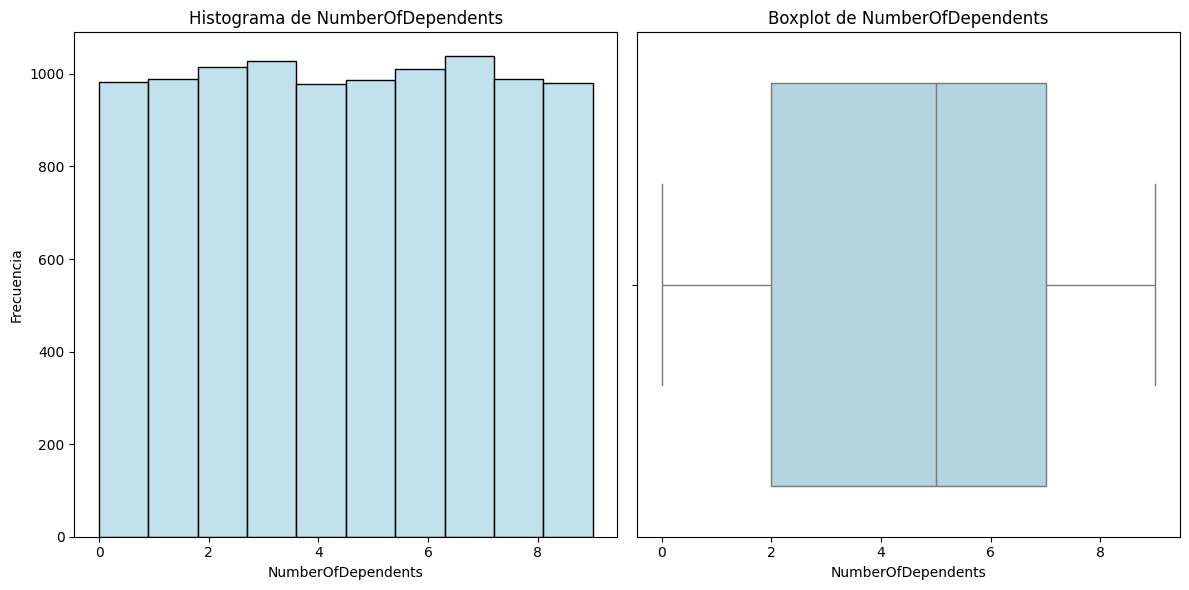

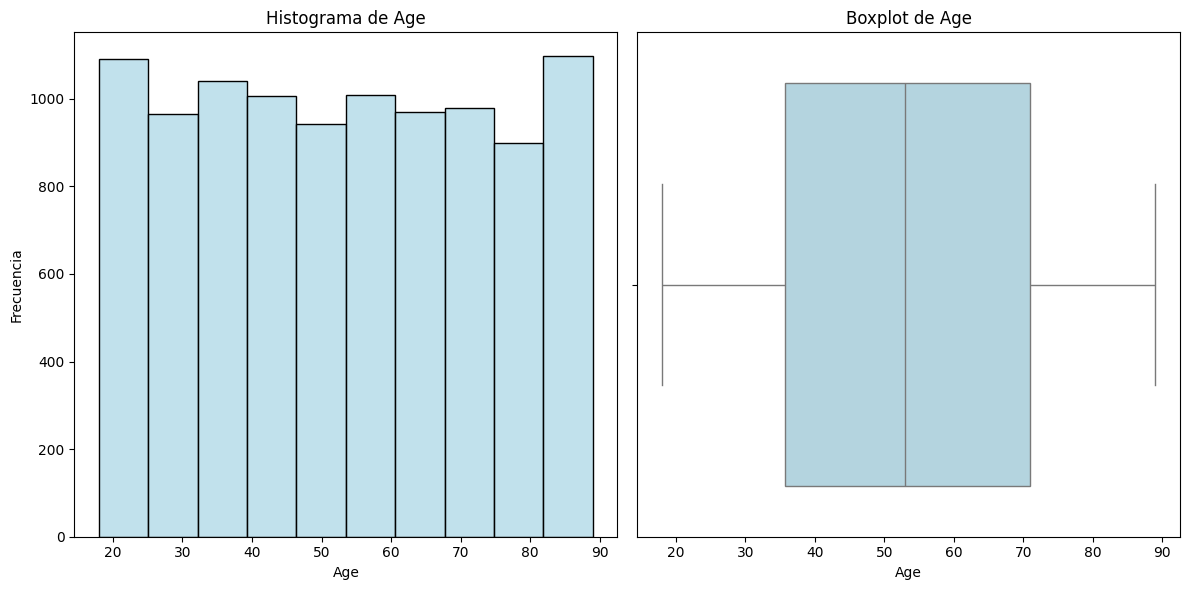

In [ ]:
variables_numericas = ['DebtRatio', 'EmploymentLength', 'NumberOfDependents', 'Age']
fn.plot_hist_box(df, variables_numericas)

# Transformaciones

In [25]:
y = df['NoPaidPerc']
x = df.drop('NoPaidPerc', axis=1)

In [26]:
scaler = None
df_historicos_scaled, sc = fn.procesar_datos(x, scaler)

In [27]:
df_historicos_scaled.head()

,CreditScore,DebtRatio,Assets,Age,NumberOfDependents,NumberOfOpenCreditLinesAndLoans,MonthlyIncome,NumberOfTimesPastDue,EmploymentLength,YearsAtCurrentAddress,...,HomeOwnership_Own,HomeOwnership_Rent,Education_Bachelor,Education_High School,Education_Masters,Education_PhD,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widowed
0,0.153005,0.016528,0.099691,0.028169,0.000000,0.105263,0.860918,0.473684,0.965517,0.620690,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.393443,0.138818,0.016119,0.394366,0.555556,0.421053,0.325016,0.684211,0.000000,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.615665,0.391192,0.591818,0.873239,0.555556,0.368421,0.047852,0.315789,0.862069,0.310345,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.114754,0.463579,0.108542,0.507042,1.000000,0.000000,0.965361,0.263158,0.758621,0.103448,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.918033,0.504890,0.102869,0.760563,0.111111,0.526316,0.364656,0.947368,0.655172,0.172414,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
import joblib

# Exportar DataFrame con joblib
joblib.dump(df_historicos_scaled, 'salidas/df_historicos_transf.pkl')
joblib.dump(y, 'salidas/v.respuesta.pkl')
joblib.dump(sc, 'salidas/scaler.pkl')

['salidas/scaler.pkl']